In [0]:
from __future__ import print_function

import pandas as pd
#pd.__version__

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#Train Set

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
#root_path = 'gdrive/My Drive/ML_assginment/'  #change dir to your project folder


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
trainset_df  = pd.read_csv('/content/gdrive/My Drive/ML_assignment/loan_analysis_trainset_29349.csv',low_memory=False)

In [4]:
trainset_df[0:5]

,index,loan_id,loan_time,loan_expiration_time,y,CDCA003,CDMC002,CDMC013,CDMC112,CDMC194,CDMC195,CDMC196,CDMC197,CDMC198,CDMC199,CDMC219,CDMC286,CDMC287,CDMC289,CDMC290,CDMC291,CDMC292,CDMC293,CDMC294,CDMC295,CDMC296,CDMC297,CDMC298,CDMC299,CDMC300,CDMC301,CDMC302,CDMC303,CDMC304,CDMC305,CDMC306,CDMC307,CDMC308,CDMC309,CDTB001,...,M3_Single day maximum_APP usage,M3_at night_APP usage,M3_public_Medium viscosity_APP usage by app,M3_public_Low viscosity_APP usage by app,M3_public_Non viscosity_APP usage by app,M3_public_High viscosity_APP usage by app,M3_minority_Medium viscosity_APP usage by app,M3_minority_Low viscosity_APP usage by app,M3_minority_Non viscosity_APP usage by app,M3_minority_High viscosity_APP usage by app,M3_Average APP usage interval,M3_Maximum number of consecutive applications by day,M6_APP usage by app,M6_Single day maximum_APP usage,M6_Single month maximum_APP usage,M6_at night_APP usage,M6_public_Medium viscosity_APP usage by app,M6_public_Low viscosity_APP usage by app,M6_public_Non viscosity_APP usage by app,M6_public_High viscosity_APP usage by app,M6_minority_Medium viscosity_APP usage by app,M6_minority_Low viscosity_APP usage by app,M6_minority_Non viscosity_APP usage by app,M6_minority_High viscosity_APP usage by app,M6_Average APP usage interval,M6_Maximum number of consecutive applications by day,M6_Number of months using the app,D7_at night_APP usage,D7_APP usage by app,D7_APP usage,D7_public_Medium viscosity_APP usage by app,D7_public_Low viscosity_APP usage by app,D7_public_Non viscosity_APP usage by app,D7_public_High viscosity_APP usage by app,D7_minority_Medium viscosity_APP usage by app,D7_minority_Low viscosity_APP usage by app,D7_minority_Non viscosity_APP usage by app,D7_minority_High viscosity_APP usage by app,last5years_overdue_times,The first APP usage time is long
0,0,1000000,2018-04-02,2018-05-02,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1239.60,2.0,2.0,0.0,0.00,0.0,6012.0,1.0,1039.60,6012.0,0.0,0.00,0.0,6011.0,1.0,200.00,6011.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,...,2.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,10.00,0.0,6.0,2.0,5.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,10.80,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,632.0
1,1,1000001,2018-04-03,2018-05-03,0.0,1.0,0.0,0.0,16837.88,274.70,274.70,274.70,1.0,1.0,1.0,6135.31,9.0,14.0,4814.0,3300.00,2.0,7299.0,9.0,10190.10,6300.0,4511.0,2396.00,2.0,4816.0,20.0,6999.50,4814.0,5411.0,2207.97,2.0,4814.0,5.0,6773.10,4900.0,12989.38,...,2.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,5.12,2.0,11.0,2.0,7.0,0.0,0.0,2.0,0.0,9.0,0.0,0.0,0.0,0.0,6.70,2.0,5.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,603.0
2,2,1000002,2018-04-04,2018-05-04,0.0,1.0,0.0,0.0,22667.64,0.00,5271.90,5271.90,0.0,1.0,1.0,74319.44,12.0,15.0,6012.0,17584.94,19.0,6012.0,36.0,33081.08,5933.0,4816.0,10673.18,9.0,7299.0,11.0,18688.28,6012.0,5933.0,5359.21,5.0,5933.0,11.0,18452.56,4899.0,38398.07,...,3.0,0.0,0.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,5.42,2.0,15.0,3.0,8.0,1.0,0.0,1.0,1.0,12.0,1.0,0.0,0.0,0.0,8.78,2.0,6.0,0.0,4.0,4.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,494.0
3,3,1000003,2018-04-04,2018-05-04,0.0,1.0,32650.0,0.0,27079.07,280.00,2877.00,2877.00,1.0,4.0,4.0,69254.40,10.0,17.0,4816.0,2917.21,4.0,6012.0,25.0,44837.94,5933.0,5933.0,2466.93,4.0,5812.0,17.0,32650.00,6012.0,6012.0,1212.92,2.0,5933.0,23.0,21539.46,4900.0,6914.56,...,2.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,7.20,2.0,10.0,2.0,5.0,0.0,0.0,1.0,1.0,8.0,0.0,0.0,0.0,0.0,9.15,2.0,5.0,0.0,3.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,236.0
4,4,1000004,2018-04-04,2018-05-04,1.0,1.0,0.0,0.0,7662.50,1549.62,1549.62,1549.62,1.0,1.0,1.0,8050.34,6.0,9.0,6012.0,3018.84,3.0,7299.0,6.0,8331.68,4900.0,9498.0,1549.62,1.0,6012.0,6.0,5532.39,7299.0,4214.0,1545.00,1.0,4900.0,3.0,5062.50,6012.0,7299.79,...,2.0,0.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,9.33,0.0,11.0,2.0,5.0,0.0,0.0,1.0,1.0,9.0,0.0,0.0,0.0,0.0,12.62,0.0,6.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,556.0


In [5]:
trainset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29349 entries, 0 to 29348
Columns: 1071 entries, index to The first APP usage time is long
dtypes: float64(1067), int64(2), object(2)
memory usage: 239.8+ MB


In [6]:
trainset_df.isna()
trainset_df.isna().sum()


index                                          0
loan_id                                        0
loan_time                                      0
loan_expiration_time                           0
y                                              0
                                              ..
D7_minority_Low viscosity_APP usage by app     0
D7_minority_Non viscosity_APP usage by app     0
D7_minority_High viscosity_APP usage by app    0
last5years_overdue_times                       0
The first APP usage time is long               0
Length: 1071, dtype: int64

74.91907731098163


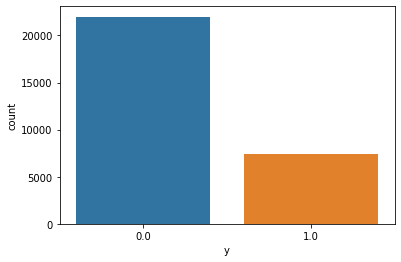

In [10]:
count_plot = sns.countplot(x='y', data=trainset_df)

count_zero = len(trainset_df[trainset_df['y']==0.0]) 
count_one  = len(trainset_df[trainset_df['y']==1.0])
print(count_zero/(count_one+count_zero)*100)



In [11]:
out_label = trainset_df.groupby('y')
diff = out_label.agg(np.mean)
diff#[0:1,2:]



,index,loan_id,CDCA003,CDMC002,CDMC013,CDMC112,CDMC194,CDMC195,CDMC196,CDMC197,CDMC198,CDMC199,CDMC219,CDMC286,CDMC287,CDMC289,CDMC290,CDMC291,CDMC292,CDMC293,CDMC294,CDMC295,CDMC296,CDMC297,CDMC298,CDMC299,CDMC300,CDMC301,CDMC302,CDMC303,CDMC304,CDMC305,CDMC306,CDMC307,CDMC308,CDMC309,CDTB001,CDTB002,CDTB003,CDTB004,...,M3_Single day maximum_APP usage,M3_at night_APP usage,M3_public_Medium viscosity_APP usage by app,M3_public_Low viscosity_APP usage by app,M3_public_Non viscosity_APP usage by app,M3_public_High viscosity_APP usage by app,M3_minority_Medium viscosity_APP usage by app,M3_minority_Low viscosity_APP usage by app,M3_minority_Non viscosity_APP usage by app,M3_minority_High viscosity_APP usage by app,M3_Average APP usage interval,M3_Maximum number of consecutive applications by day,M6_APP usage by app,M6_Single day maximum_APP usage,M6_Single month maximum_APP usage,M6_at night_APP usage,M6_public_Medium viscosity_APP usage by app,M6_public_Low viscosity_APP usage by app,M6_public_Non viscosity_APP usage by app,M6_public_High viscosity_APP usage by app,M6_minority_Medium viscosity_APP usage by app,M6_minority_Low viscosity_APP usage by app,M6_minority_Non viscosity_APP usage by app,M6_minority_High viscosity_APP usage by app,M6_Average APP usage interval,M6_Maximum number of consecutive applications by day,M6_Number of months using the app,D7_at night_APP usage,D7_APP usage by app,D7_APP usage,D7_public_Medium viscosity_APP usage by app,D7_public_Low viscosity_APP usage by app,D7_public_Non viscosity_APP usage by app,D7_public_High viscosity_APP usage by app,D7_minority_Medium viscosity_APP usage by app,D7_minority_Low viscosity_APP usage by app,D7_minority_Non viscosity_APP usage by app,D7_minority_High viscosity_APP usage by app,last5years_overdue_times,The first APP usage time is long
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,15246.326678,1.015246e+06,0.609150,635.879749,51.918324,11003.793498,466.921665,1759.895331,2822.731569,0.205885,0.725760,1.088594,21383.464951,4.013325,5.496589,3342.200609,4665.557905,2.938330,3623.262825,10.052028,18717.413082,3590.515372,2928.455248,1896.241909,1.752319,3412.593778,6.462752,8778.732325,3406.836547,2497.031790,1030.403829,1.156631,3186.664863,4.615699,5582.683972,3227.148717,8979.673947,22695.173807,46468.041501,84254.326732,...,1.900628,0.320357,0.316036,0.650400,0.647853,5.261006,0.040431,0.001001,0.0,0.203793,9.296966,1.425641,8.144943,1.933646,4.988676,0.382891,0.419547,0.974122,0.677460,5.770329,0.047162,0.001364,0.0,0.206977,14.138211,1.477670,3.866200,0.077679,2.535565,2.576314,0.053757,0.10724,0.617155,1.696971,0.006185,0.000136,0.0,0.046662,0.260642,285.342323
1.0,12964.406331,1.012964e+06,0.623013,689.512206,39.292849,10961.751301,415.407655,1714.562212,2836.863744,0.191550,0.656568,1.010053,19191.336346,3.723951,5.233664,3261.897568,4707.248560,2.978807,3670.708328,9.726532,18445.684298,3660.707784,2728.419644,1828.752720,1.614183,3372.711996,6.104334,8420.517676,3419.212064,2246.774623,979.933349,1.106779,3122.496807,4.392881,5358.278033,3227.148214,8869.508565,21861.386215,45908.001383,80305.786768,...,1.937101,0.415704,0.238147,0.647331,0.629942,5.790246,0.047276,0.000543,0.0,0.186659,8.409019,1.554137,8.600598,1.971200,5.399674,0.488792,0.328080,1.013857,0.655889,6.306752,0.053254,0.001359,0.0,0.189241,12.754370,1.605488,3.803152,0.098764,2.555767,2.612824,0.037359,0.10379,0.600734,1.753294,0.007064,0.000000,0.0,0.045374,0.434859,271.844043


In [0]:
loan_vars = trainset_df.columns.values.tolist()

Y = ['y']
X = [i for i in loan_vars if i not in Y]
X = X[4:]


###Splitting the data into training and test sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(trainset_df[X], trainset_df[Y], test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(26414, 1066) (26414, 1)
(2935, 1066) (2935, 1)


## 1. Logistic Regression

In [66]:
ml_lg = LogisticRegression()

model_lg = ml_lg.fit(X_train, y_train)
predict_lg = model_lg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 2. K-Nearest Neighbors (KNN) algorithm

In [67]:
from sklearn.neighbors import KNeighborsClassifier

#from sklearn import metrics

#Try running from k=1 through 20 and record testing accuracy
#k_range = range(1,21)
#scores = {}
#scores_list = []
#for k in k_range:
#        model_knn = KNeighborsClassifier(n_neighbors=k)
#        model_knn.fit(X_train,y_train)
#        predict_knn=model_knn.predict(X_test)
#        scores[k] = metrics.accuracy_score(y_test,predict_knn)
#        scores_list.append(metrics.accuracy_score(y_test,predict_knn))

#scores

model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X_train,y_train)
predict_knn = model_knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


## 3. Naive Bayes Classification

In [68]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
predict_gnb = model_gnb.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 4. Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model_rfc = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model_rfc.fit(X_train, y_train)
predict_rfc = model_rfc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


## Evaluating models

In [70]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, predict_lg))
print("Accuracy:",metrics.accuracy_score(y_test, predict_knn))
print("Accuracy:",metrics.accuracy_score(y_test, predict_gnb))
print("Accuracy:",metrics.accuracy_score(y_test, predict_rfc))

Accuracy: 0.7543441226575809
Accuracy: 0.7417376490630324
Accuracy: 0.6415672913117547
Accuracy: 0.965587734241908


#Read Test Set

In [0]:
testset_df  = pd.read_csv('/content/gdrive/My Drive/ML_assignment/loan_analysis_testset_3261.csv',low_memory=False)

In [56]:
testset_df[0:5]

,index,loan_id,loan_time,loan_expiration_time,y,CDCA003,CDMC002,CDMC013,CDMC112,CDMC194,CDMC195,CDMC196,CDMC197,CDMC198,CDMC199,CDMC219,CDMC286,CDMC287,CDMC289,CDMC290,CDMC291,CDMC292,CDMC293,CDMC294,CDMC295,CDMC296,CDMC297,CDMC298,CDMC299,CDMC300,CDMC301,CDMC302,CDMC303,CDMC304,CDMC305,CDMC306,CDMC307,CDMC308,CDMC309,CDTB001,...,M3_Single day maximum_APP usage,M3_at night_APP usage,M3_public_Medium viscosity_APP usage by app,M3_public_Low viscosity_APP usage by app,M3_public_Non viscosity_APP usage by app,M3_public_High viscosity_APP usage by app,M3_minority_Medium viscosity_APP usage by app,M3_minority_Low viscosity_APP usage by app,M3_minority_Non viscosity_APP usage by app,M3_minority_High viscosity_APP usage by app,M3_Average APP usage interval,M3_Maximum number of consecutive applications by day,M6_APP usage by app,M6_Single day maximum_APP usage,M6_Single month maximum_APP usage,M6_at night_APP usage,M6_public_Medium viscosity_APP usage by app,M6_public_Low viscosity_APP usage by app,M6_public_Non viscosity_APP usage by app,M6_public_High viscosity_APP usage by app,M6_minority_Medium viscosity_APP usage by app,M6_minority_Low viscosity_APP usage by app,M6_minority_Non viscosity_APP usage by app,M6_minority_High viscosity_APP usage by app,M6_Average APP usage interval,M6_Maximum number of consecutive applications by day,M6_Number of months using the app,D7_at night_APP usage,D7_APP usage by app,D7_APP usage,D7_public_Medium viscosity_APP usage by app,D7_public_Low viscosity_APP usage by app,D7_public_Non viscosity_APP usage by app,D7_public_High viscosity_APP usage by app,D7_minority_Medium viscosity_APP usage by app,D7_minority_Low viscosity_APP usage by app,D7_minority_Non viscosity_APP usage by app,D7_minority_High viscosity_APP usage by app,last5years_overdue_times,The first APP usage time is long
0,29349,1029349,2018-09-06,2018-10-06,NaN,1.0,0.0,0.0,651.00,134.91,134.91,134.91,1.0,1.0,1.0,1623.88,6.0,6.0,4214.0,2211.93,2.0,4214.0,2.0,2211.93,4214.0,7399.0,1233.60,1.0,7399.0,1.0,1233.60,7399.0,6012.0,647.30,1.0,6012.0,2.0,1188.97,6012.0,4227.74,...,2.0,0.0,1.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,4.83,2.0,11.0,2.0,8.0,0.0,1.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0,7.15,2.0,4.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,93.0
1,29350,1029350,2018-09-06,2018-10-06,NaN,1.0,0.0,0.0,7245.45,0.00,0.00,0.00,0.0,0.0,0.0,600.00,2.0,4.0,5411.0,2777.30,7.0,5411.0,17.0,7245.45,8398.0,4214.0,108.61,1.0,6011.0,2.0,600.00,5411.0,0.0,0.00,0.0,5311.0,11.0,426.27,4814.0,2885.91,...,2.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,5.25,2.0,8.0,2.0,5.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,12.56,2.0,4.0,0.0,3.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,356.0
2,29351,1029351,2018-09-06,2018-10-06,NaN,1.0,1650.0,0.0,9395.82,1214.20,5193.25,5193.25,1.0,4.0,4.0,26906.59,13.0,15.0,4214.0,8096.32,6.0,6012.0,16.0,15812.60,6012.0,6012.0,3149.18,2.0,4814.0,7.0,9159.92,4814.0,4816.0,2111.89,4.0,4816.0,18.0,8534.48,4816.0,20281.25,...,2.0,0.0,1.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,6.42,2.0,11.0,2.0,6.0,0.0,1.0,1.0,1.0,8.0,0.0,0.0,0.0,0.0,7.07,2.0,5.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,347.0
3,29352,1029352,2018-09-06,2018-10-06,NaN,1.0,0.0,0.0,5700.00,0.00,0.00,0.00,0.0,0.0,0.0,2403.79,4.0,5.0,5411.0,1900.00,1.0,8062.0,2.0,40000.00,8062.0,5933.0,1400.00,1.0,5411.0,3.0,5700.00,5411.0,4816.0,437.00,2.0,5933.0,1.0,1400.00,5933.0,3870.95,...,2.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,14.80,0.0,7.0,2.0,3.0,2.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,1.0,23.50,0.0,4.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,213.0
4,29353,1029353,2018-09-06,2018-10-06,NaN,1.0,0.0,0.0,19826.50,0.00,0.00,0.00,0.0,0.0,0.0,165572.05,6.0,7.0,6012.0,22742.13,6.0,6012.0,28.0,112320.45,6012.0,5933.0,10046.67,6.0,5933.0,28.0,53251.60,5960.0,5411.0,3270.52,5.0,5411.0,19.0,12888.42,5933.0,38396.38,...,2.0,2.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,6.33,2.0,9.0,2.0,5.0,2.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,7.15,2.0,4.0,1.0,3.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,377.0


In [57]:
testset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Columns: 1071 entries, index to The first APP usage time is long
dtypes: float64(1067), int64(2), object(2)
memory usage: 26.6+ MB


In [58]:
testset_df.isna()
testset_df.isna().sum()

index                                             0
loan_id                                           0
loan_time                                         0
loan_expiration_time                              0
y                                              3261
                                               ... 
D7_minority_Low viscosity_APP usage by app        0
D7_minority_Non viscosity_APP usage by app        0
D7_minority_High viscosity_APP usage by app       0
last5years_overdue_times                          0
The first APP usage time is long                  0
Length: 1071, dtype: int64

In [0]:
loan_vars_test = testset_df.columns.values.tolist()

y = ['y']
X = [i for i in loan_vars_test if i not in y]
X = X[4:]

## 1. Logistic Regression

In [0]:
predict_lg = model_lg.predict(testset_df[X])


## 2. KNN Algorithm

In [0]:
predict_knn = model_knn.predict(testset_df[X])

## 3. Naive Bayes Classification

In [0]:
predict_gnb = model_gnb.predict(testset_df[X])

## 4. Random Forest Classification

In [0]:
predict_rfc = model_rfc.predict(testset_df[X])